In [1]:
import tensorflow as tf

/Users/Th3D4rKnight/anaconda3/envs/aarus_project/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = tf.keras.datasets.mnist


In [5]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 5s 0us/step


In [6]:
X_train = tf.keras.utils.normalize(X_train,axis=1)
X_test = tf.keras.utils.normalize(X_test,axis=1)
model = tf.keras.models.Sequential()
model.add(tf.layers.Flatten())
model.add(tf.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])



In [7]:
model.fit(X_train,y_train,epochs=3)

Epoch 1/3
60000/60000 [==============================] - 13s 216us/step - loss: 0.2590 - acc: 0.9244
Epoch 2/3
60000/60000 [==============================] - 7s 121us/step - loss: 0.1081 - acc: 0.9657
Epoch 3/3
60000/60000 [==============================] - 7s 121us/step - loss: 0.0734 - acc: 0.9764


In [8]:
model.predict(X_train[100])

ValueError: Error when checking input: expected sequential_input to have 3 dimensions, but got array with shape (28, 28)

In [9]:
model.save('minstmodel.model')


In [10]:
new_model = tf.keras.models.load_model('minstmodel.model')

In [11]:
pred = new_model.predict([X_test])
print(pred)

[[1.0867666e-09 5.3588695e-10 3.7978086e-08 ... 9.9999762e-01
  1.0835041e-10 1.2936034e-07]
 [3.5840537e-07 4.5556753e-04 9.9952066e-01 ... 2.3823349e-08
  9.1782886e-06 1.3707579e-12]
 [8.6552296e-07 9.9935597e-01 1.9820609e-05 ... 2.8484807e-04
  1.4517998e-04 3.7161071e-06]
 ...
 [2.2483144e-09 1.4673532e-07 9.4500630e-09 ... 2.3864729e-06
  5.7989905e-07 2.1722289e-04]
 [4.2849056e-06 7.3504729e-08 2.1582155e-08 ... 1.7412687e-07
  1.8827596e-03 1.9170001e-07]
 [1.8479680e-06 2.8561706e-08 9.8804804e-08 ... 1.2084736e-10
  2.7237506e-08 3.1495200e-09]]


In [12]:
import numpy as np

In [14]:
print(np.argmax(pred[0]))

7


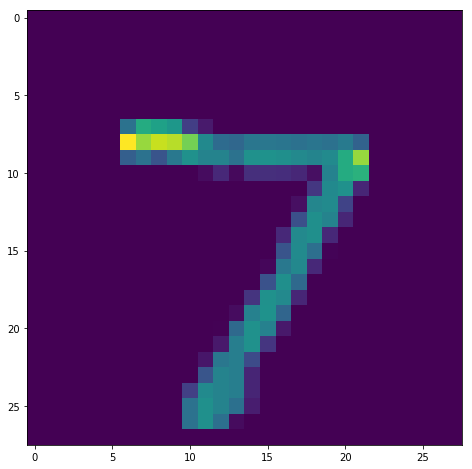

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.imshow(X_test[0])
plt.show()
